# Question

#### Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
###### Sales -- Unit sales (in thousands) at each location
###### Competitor Price -- Price charged by competitor at each location
###### Income -- Community income level (in thousands of dollars)
###### Advertising -- Local advertising budget for company at each location (in thousands of dollars)
###### Population -- Population size in region (in thousands)
###### Price -- Price company charges for car seats at each site
###### Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
###### Age -- Average age of the local population
###### Education -- Education level at each location
###### Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
###### US -- A factor with levels No and Yes to indicate whether the store is in the US or not
###### The company dataset looks like this: 
 
## Problem Statement:
###### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
###### Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['figure.dpi'] = (150)
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor 
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,classification_report
from sklearn import tree
sns.set_theme(style='darkgrid',palette='rainbow')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/yashvardhanpatil/Assignment-Dataset/main/Random%20Forests/Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Basic EDA

In [3]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
df.isna().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [6]:
# Finding Corr

<AxesSubplot:>

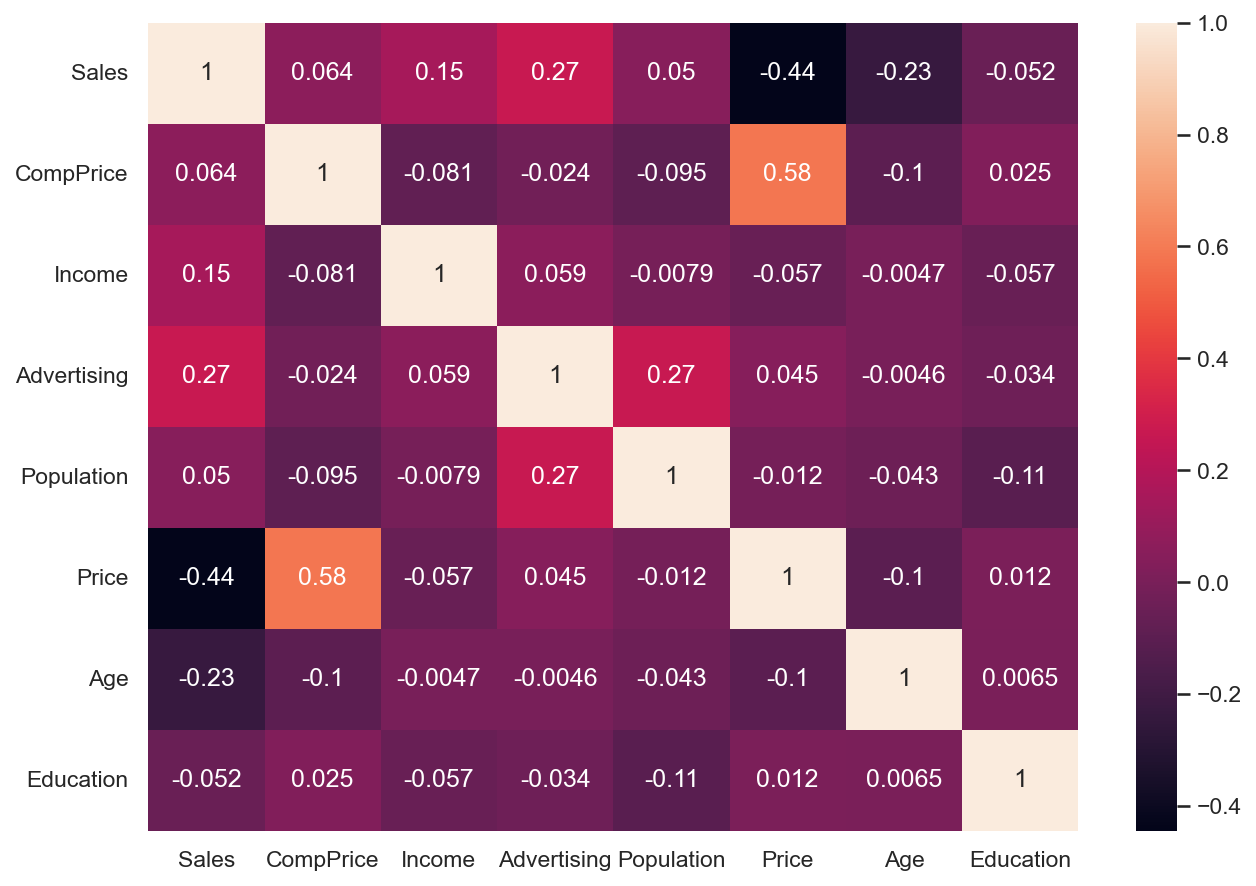

In [7]:
sns.heatmap(df.corr(),annot=True)

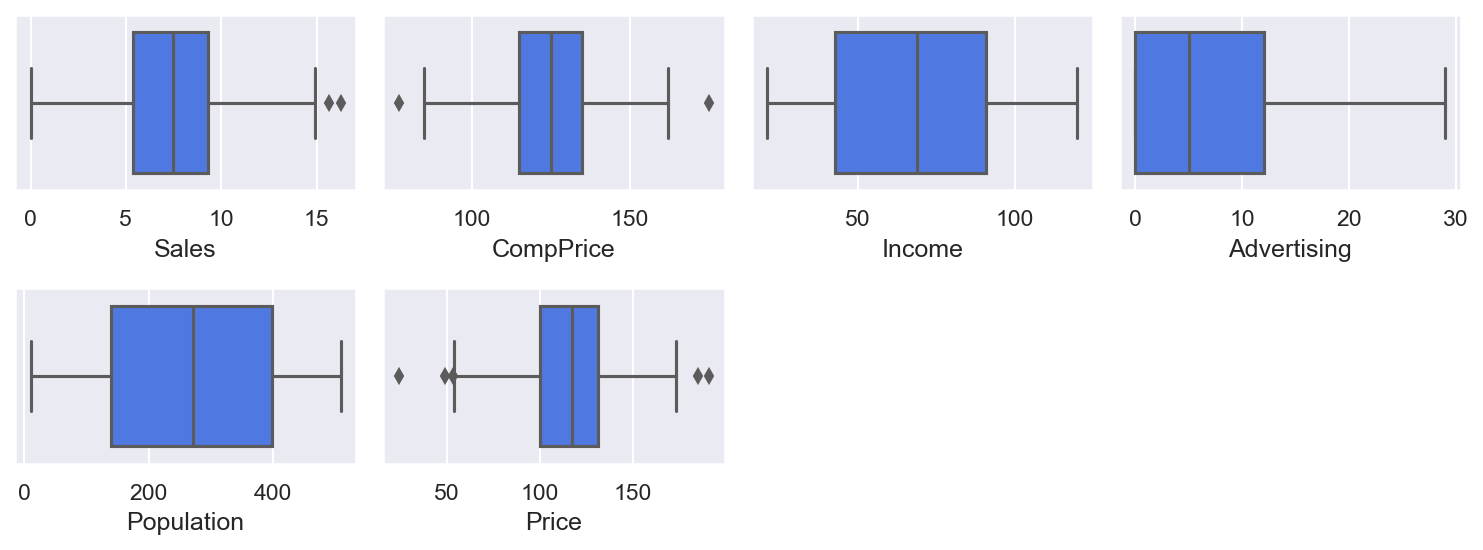

In [27]:
# finding Outlier in column 
plt.subplot(4,4,1)
sns.boxplot(df['Sales'])

plt.subplot(4,4,2)
sns.boxplot(df['CompPrice'])

plt.subplot(4,4,3)
sns.boxplot(df['Income'])

plt.subplot(4,4,4)
sns.boxplot(df['Advertising'])

plt.subplot(4,4,5)
sns.boxplot(df['Population'])

plt.subplot(4,4,6)
sns.boxplot(df['Price'])

plt.tight_layout()

In [28]:
def outlier_detection(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(105*iqr)
    
    return lower,upper

In [32]:
outlier_detection(df,'Sales')

(-407.26, 15.215)

In [34]:
outlier_detection(df,'CompPrice')


(-1985.0, 165.0)

In [35]:
outlier_detection(df,'Price')

(-3155.0, 177.5)

In [36]:
df.loc[df['Sales']>15.215,'Sales' ]=15.215

In [44]:
df.loc[df['CompPrice']>165.0,'CompPrice']= 165.0

In [38]:
df.loc[df['Price']>177.5,'Price'] = 177.5

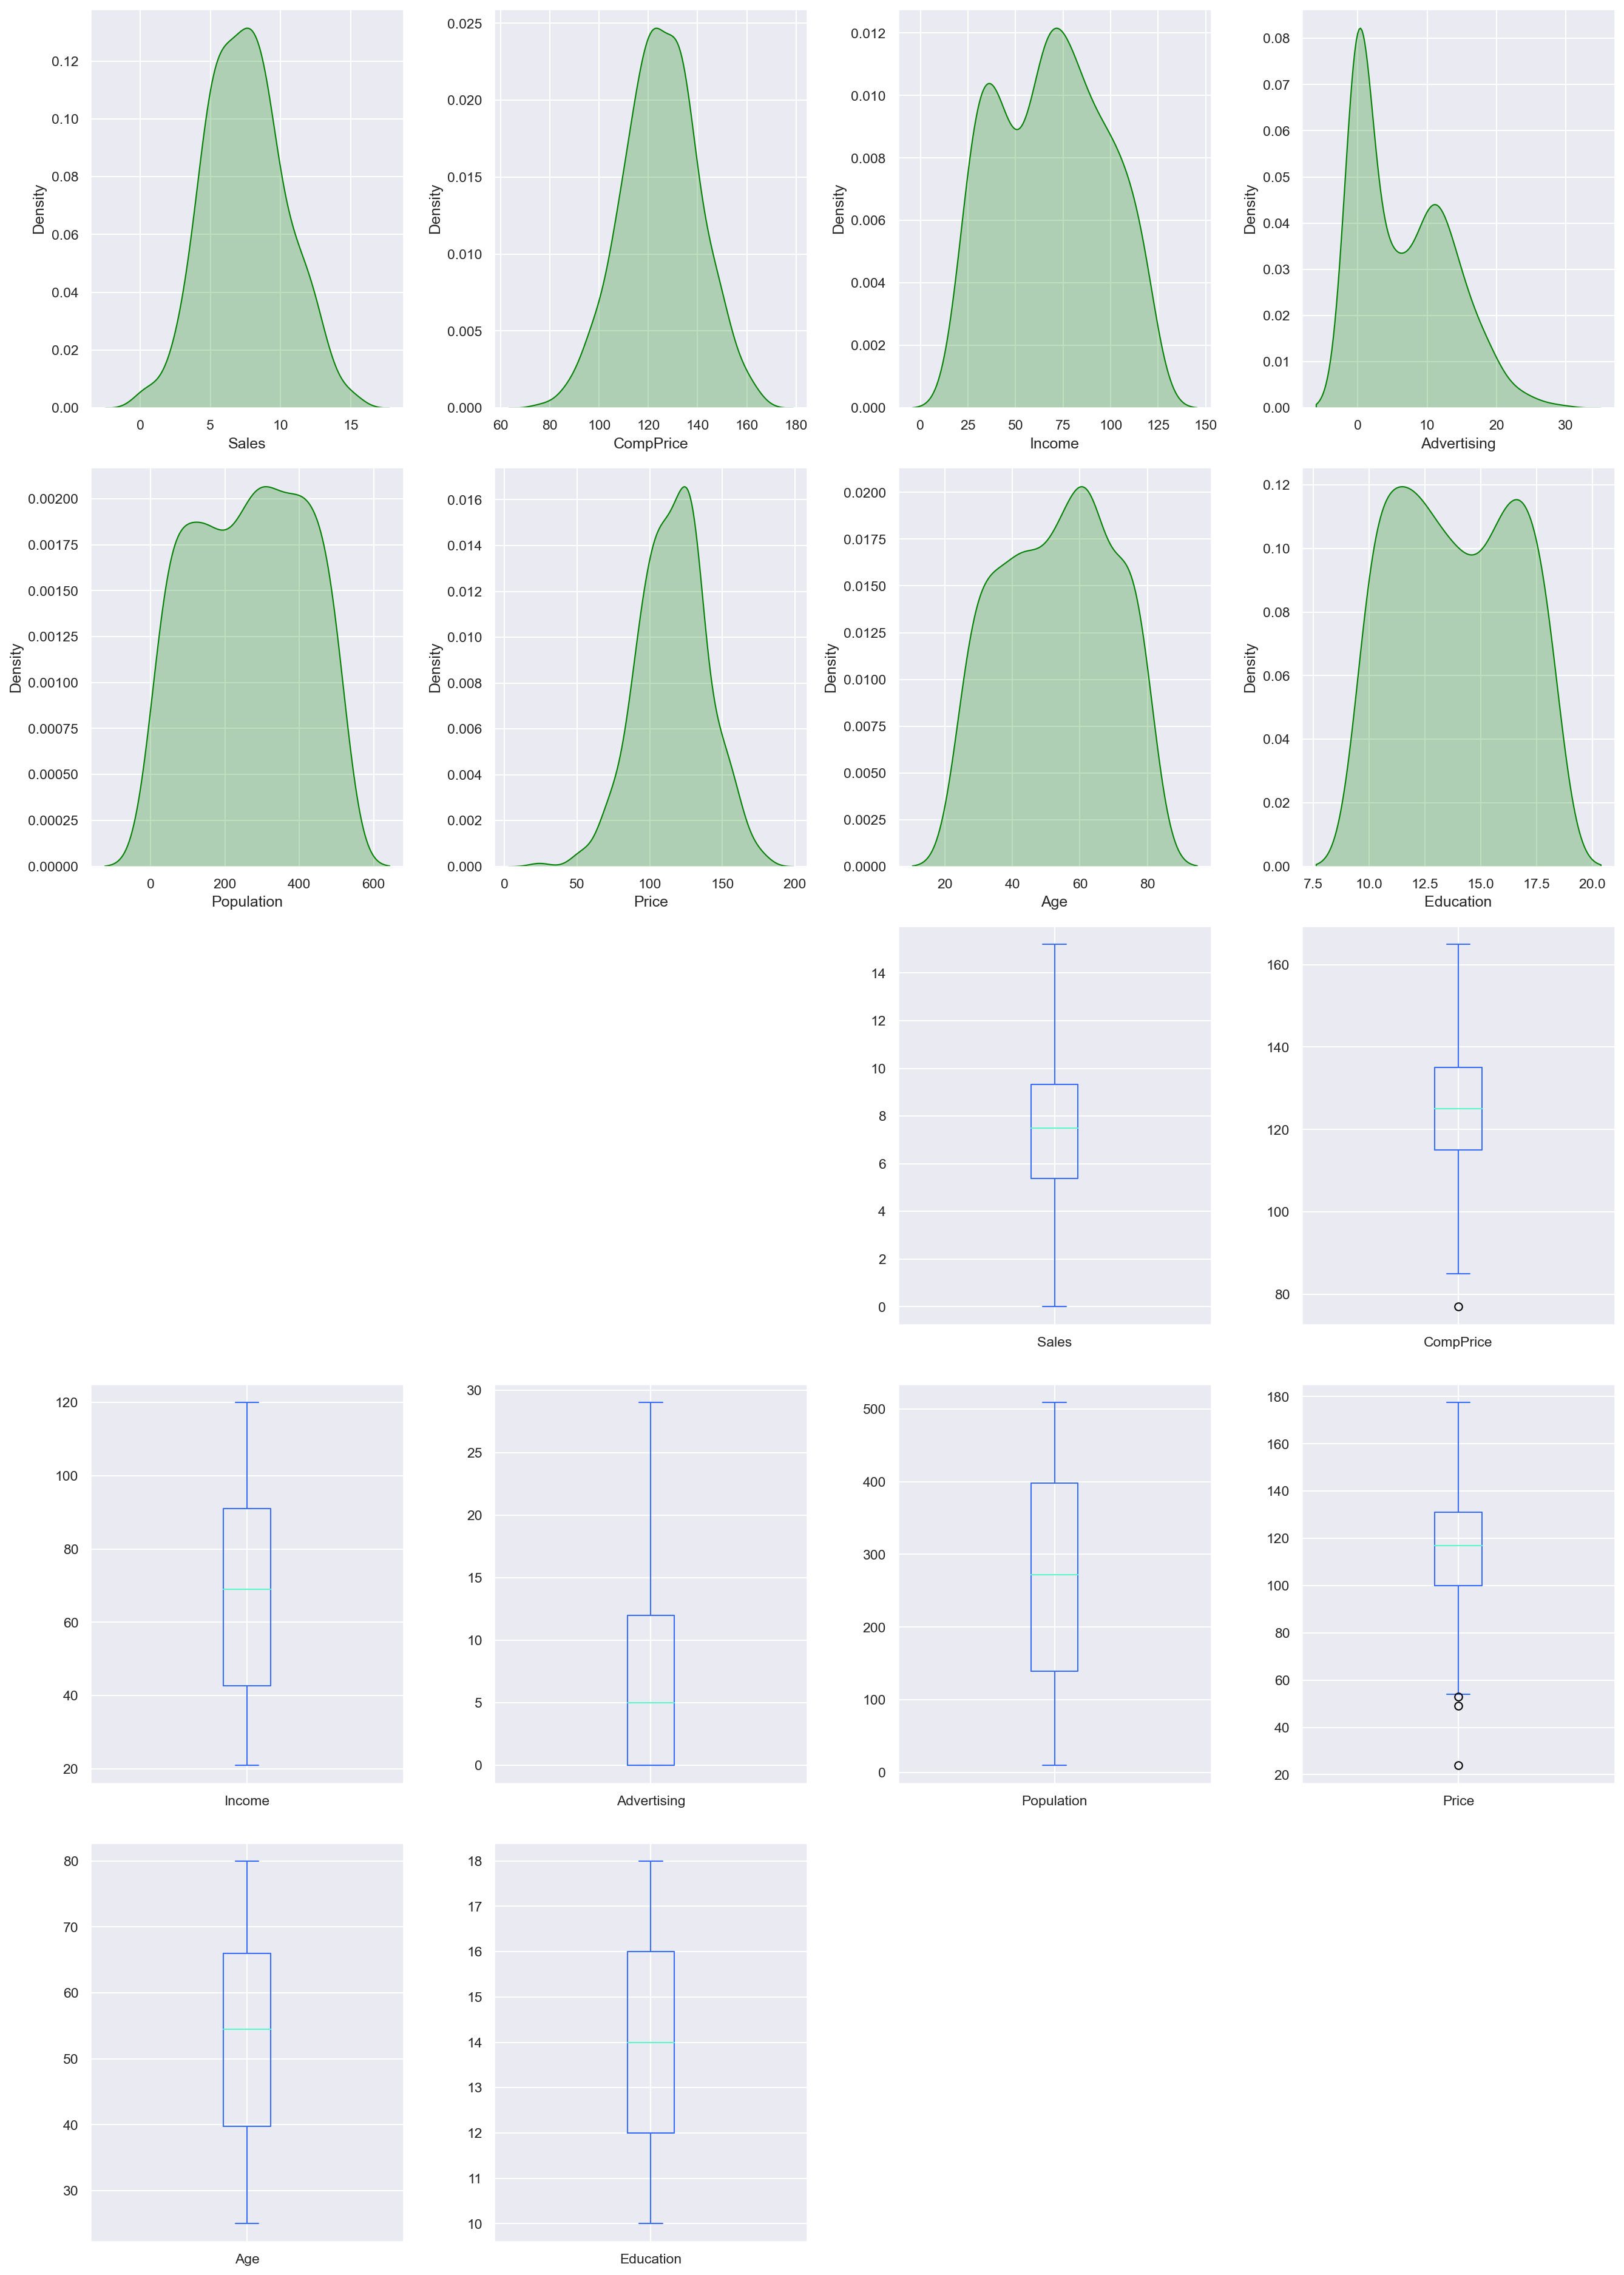

In [49]:
plt.figure(figsize=(18,40))
for i,col in enumerate(['Sales','CompPrice','Income','Advertising',
                        'Population','Price','Age','Education'],1):
    plt.subplot(8,4,i)
    sns.kdeplot(df[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    df[col].plot.box()
plt.tight_layout() 
plt.show()

In [8]:
# Converting Categorical columns to numbric


In [50]:
from sklearn.preprocessing import OrdinalEncoder

In [51]:
df_cat = df.select_dtypes(object).columns
df_cat

Index([], dtype='object')

In [52]:
oe = OrdinalEncoder()

df[df_cat] = oe.fit_transform(df[df_cat])

In [53]:
df['High'] = df.Sales.map(lambda x : 1 if x>7.49
                         else 0)

In [54]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High
0,9.50,138,73,11,276,120.0,0.0,42,17,1.0,1.0,1
1,11.22,111,48,16,260,83.0,1.0,65,10,1.0,1.0,1
2,10.06,113,35,10,269,80.0,2.0,59,12,1.0,1.0,1
3,7.40,117,100,4,466,97.0,2.0,55,14,1.0,1.0,0
4,4.15,141,64,3,340,128.0,0.0,38,13,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128.0,1.0,33,14,1.0,1.0,1
396,6.14,139,23,3,37,120.0,2.0,55,11,0.0,1.0,0
397,7.41,162,26,12,368,159.0,2.0,40,18,1.0,1.0,0
398,5.94,100,79,7,284,95.0,0.0,50,12,1.0,1.0,0


In [55]:
x = df.iloc[:,1:11]
y = df['High']

In [56]:
# Dependent Vaeiable
y

0      1
1      1
2      1
3      0
4      0
      ..
395    1
396    0
397    0
398    0
399    1
Name: High, Length: 400, dtype: int64

In [57]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)


In [58]:
rfc = RandomForestRegressor()

rfc.fit(xtrain,ytrain)
ypred = rfc.predict(xtest)
print(f"Training Accuracy : {rfc.score(xtrain,ytrain)}\n Testing Accuracy:{rfc.score(xtest,ytest)} ")



Training Accuracy : 0.9200456267822962
 Testing Accuracy:0.46043999999999996 


# Hyperparameter Tunning

In [59]:
from sklearn.model_selection import GridSearchCV

In [65]:
rfc = RandomForestClassifier()

params= {
    'criterion': ['gini','entropy'],
    'max_depth':[10,15,18,19,20,21],
     'min_samples_split': [5,6,9,10,11],
    'n_estimators': [100,120,140,150]
}

In [66]:
grid = GridSearchCV(RandomForestClassifier(),param_grid=params,verbose=1)

In [67]:
grid.fit(xtrain,ytrain)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 15, 18, 19, 20, 21],
                         'min_samples_split': [5, 6, 9, 10, 11],
                         'n_estimators': [100, 120, 140, 150]},
             verbose=1)

In [68]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 18,
 'min_samples_split': 6,
 'n_estimators': 100}

In [70]:
rfc = RandomForestClassifier(min_samples_split=6,n_estimators=100,criterion='gini',max_depth=18)

rfc.fit(xtrain,ytrain)
ypred = rfc.predict(xtest)
print(f"Training Accuracy : {rfc.score(xtrain,ytrain)}\n Testing Accuracy:{rfc.score(xtest,ytest)} ")



Training Accuracy : 0.990625
 Testing Accuracy:0.8125 
